# 2. Alphabetical Sort

In [39]:
import matplotlib.pyplot as plt
import time
import numpy as np

### Counting sort

This function gives in input an array of integers and returns the sorted array and the order of them.

In [2]:
def counting_sort(array):
    aux_array = [0]*1000 # make auxilary array of size 1000, we suppose the ordinal are between 0 and 999, however it can be any range
    order = [0]*len(array)
    # calculate the frequencies 
    for i in array:
        aux_array[i] += 1
    # calculate the cumulative values of the frequencies
    for i in range(1,len(aux_array)):
        aux_array[i] += aux_array[i-1]
    sorted_array = [None]*len(array)
    # put tha values in array to sorted array on the right position and store the order
    for j,i in enumerate(array):
        order[aux_array[i]-1] = j
        sorted_array[aux_array[i]-1] = i
        aux_array[i] += -1
    return sorted_array, order

In [3]:
counting_sort([3,6,9,2,1,0])

([0, 1, 2, 3, 6, 9], [5, 4, 3, 0, 1, 2])

### Counting sort for letters


This function gives in input an array of letters and returns them in alphabetical order.

In [24]:
def counting_sort_alpha(arr):
    
    count=[ 0 for i in range(256)] #fill counter with zeros 256 index because we are using ord
    alpha_=['' for _ in arr] # to fill the ordered letters 
    
    for a in arr:
        count[ord(a)] += 1 # count occurrence of each character and fill Corresponding ord index with letter counter
        #print(count)
        #print("==================================================")
    
    for i in range(len(count)): 
        count[i] = count[i] + count[i-1] #put each letter in its actual Position the count[i] 
        
        #print(count)
    #print("==================================================")
        
    for i in range(len(arr)): # for each index number from above minus 1 put the letter in the index number       
        count[count[ord(arr[i])]-1] = arr[i] 
        count[ord(arr[i])] -= 1
        
        #print(count)
    #print("==================================================")
    for i in range(len(arr)): 
        alpha_[i] = count[i] 
        #print(count[i] )
    return (print(alpha_ , end=""))

In [25]:
counting_sort_alpha(['z','y','x','w','v','u','t','s','r','q','p','o','n','m','l','k','i','h','g','f','e','d','c','b','a'])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

### Running time for Counting Sort for letters

#### Theoretical

The counting sort alpha is basically 3 for-loops. The first and third loops look at the entire array of letters and positions them in a certain position. The second loop is only concerned with putting each letter in its actual position the count[i]. Then first and third we will have a complexity of O (n), for the second O (k). Adding these values ​​we will have that the complexity will be O (n + k).


#### Empirical

In [102]:
def plot_count_sort():    
    time_tot = list()
    # change m from 10 to 100000 with steps of 10000
    for m in range(10,100000,10000):
        time_ = list()
        let = np.random.randint(ord('A'), ord('z')+1, m)
        start = time.time()
        sorted_words_list = counting_sort(let) # same thing of counting_sort_alpha
        end_time = time.time()
        time_.append(end_time - start)
        time_tot.append(sum(time_))
   #PLOT
    fig = plt.figure(figsize=(16,4))
    plt.plot(range(10,100000,10000),time_tot)
    plt.xlabel('Letter lenght')
    plt.ylabel('Running time (secs)')
    plt.title('Running time for counting sort')     

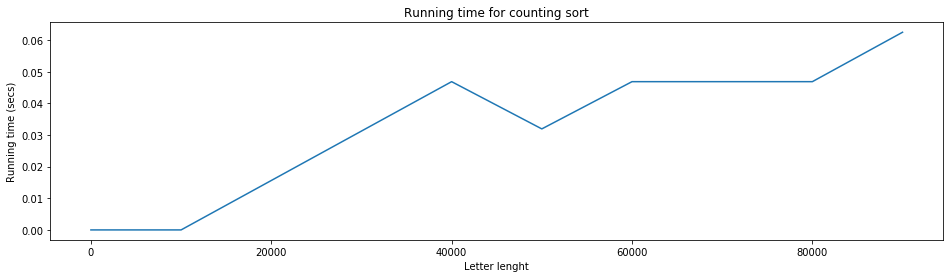

In [108]:
plot_count_sort()

As we can observe the complexity is linear

### Alphabetical sort based on counting sort

The goal is to sort an array of strings alphabetically.
What we will do first is to create a matrix containing for each position a value that corresponds to a letter.
Then we will order this matrix starting from the first column to the last one.
We must be careful NOT to reorder the columns already ordered because in that case we could remix.

We need to convert all letter of our words in number and store them in a matrix to compare them.

In [76]:
def create_matrix(words):  
    
    m = max(map(len, words))
    n = len(words)
    arrays = np.zeros((n, m+1), dtype=int)
    arrays[:,-1] = range(n)
    for i,word in enumerate(words):
        arrays[i,range(len(word))] = list(map(ord, word.lower()))
        
    return arrays

Given an ordered array, if there is 2 or more equal value, merge them in a 'group'

In [137]:
import numpy as np

In [77]:
def make_group(array, index):
    problem_list = list()
    problem = [index[0]]
    for i in range(1,len(array)):
        if array[i] == array[i-1]:
            problem.append(index[i])
        else:
            problem_list.append(problem)
            problem = [index[i]]
    problem_list.append(problem)
    return problem_list


In [138]:
make_group([0, 1, 1, 3, 6, 9], [5, 4, 3, 0, 1, 2])

[[5], [4, 3], [0], [1], [2]]

Now you need to see how many equal values there are for each 'column'. 
If it is one it means that the value is in the correct position, if it is not so, then we apply the previous function to those 'column' and we'll order them.
This is a recursive function becouse if there are further equal values after those found then I call the function and I also order and concaten them.


In [78]:
def sort_eq_col(arrays, i):
    
    if arrays.shape[0] == 1:
        return arrays
    else:
        # reorder equal columns (splitted by 'group') 
        sorted_array, order = counting_sort(arrays[:,i])
        arrays = arrays[order,:]
        
        if (i+1) < arrays.shape[1] :
            list_groups = make_group(sorted_array,list(range(arrays.shape[0])))
            list_array = list()
            for problem in list_groups:
                list_array.append(sort_eq_col(arrays[problem,:], i+1))
            arrays = np.concatenate(list_array, axis = 0)
        return arrays

#### Finally we have our function

Sort words in alphabetical order

In [79]:
def alpha_counting_sort():
    words=list(map(str,input("Enter words: ").split()))
    arrays = create_matrix(words)
   
    sorted_array = sort_eq_col(arrays, 0)
    order = list(map(int, sorted_array[:,-1]))
    return([words[i] for i in order])

In [80]:
sorted_words_list = alpha_counting_sort()
print(sorted_words_list)

Enter words: ciao hello english italian Roma Rome
['ciao', 'english', 'hello', 'italian', 'Roma', 'Rome']


### Running Time for alphabetical sort

#### Theoretical

This algorithm was implemented through a recursive function. In particular, putting the words 'one above the other', when there are two identical letters on the same 'column', a group of letters to be ordered is created and the function is called.
The worst case occurs if the words are all the same so we have to call the function L times, ie the word length.
So, since the counting sort algorithm has a running time of O (k + n), we have to repeat this L times.
So for this algorithm the complexity will be O(Lk + Ln).

#### Empirical


Adjustment to the algorithm that first took the words that the user wrote, now the words are already present in an external array.

In [87]:
def alpha_counting_sortC(words):
    arrays = create_matrix(words)
    sorted_array = sort_eq_col(arrays, 0)
    order = list(map(int, sorted_array[:,-1]))
    return([words[i] for i in order])

In [99]:
chr_vec = np.vectorize(chr)
def plot_alpha_sort():
    # we need to fix the number of words
    m = 50
    time_tot = list()
    # change n from 10 to 10000 with steps of 1000
    for n in range(10,10000,1000):
        time_ = list()
        
        ordinals_list = np.random.randint(ord('A'), ord('z')+1, (m,n))
        chr_lists = chr_vec(ordinals_list)
        words_list = list()
        # convert ordinals to words
        for i in range(chr_lists.shape[0]):
            words_list.append("".join(chr_lists[i,:]))
        start_time = time.time()
        sorted_words_list = alpha_counting_sortC(words_list)
        end_time = time.time()
        time_.append(end_time - start_time)
        time_tot.append(sum(time_))
   
    # PLOT
    fig = plt.figure(figsize=(16,4))
    plt.plot(range(10,100000,10000),time_tot)
    plt.xlabel('Number of words')
    plt.ylabel('Running time (secs)')
    plt.title('Running time for fixed word lenght')

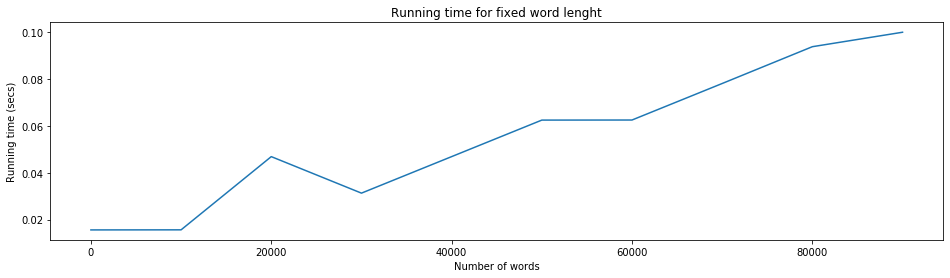

In [101]:
plot_alpha_sort()

##### Attention

The last part of this task is based on the algorithm of group # 24, we thank them for the help.

# 3. Find similar wines!

This k-means is implemented by reasoning in terms of products between matrices.

Our goal is to create clusters, which will have deviance within (inside groups) and a deviance between (between groups).
Therefore, we can minimize deviance within or maximize deviance between.
We choose to minimize deviance within because we can set a threshold for which our objective function is satisfied, if it is satisfied it means that the position of the centroids varies little.

The objective function will be:
\begin{equation*}
minimize ||X-UX^{c}||^{2}
\end{equation*}

Where:
- X is our data matrix (NxJ)
- U is our membership matrix (NxK) that defines where u_{ik} = 1 if the unit i belongs to the class k, u_{ik} = 0 otherwise.
-  X^{c} is our centroid matrix (KxJ)

### 1. Read and standardize data

In [3]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from random import randrange
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

Import data.

In [4]:
data = pd.DataFrame(genfromtxt(r'C:\Users\aless\Desktop\data\wine.data', delimiter=','))
data = data.drop(data.columns[[0]], axis='columns')

#### datacolumns
data.columns = [

    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280/OD315_of_diluted_wines',
    'Proline']



Standardize dataframe.

In [5]:
def diagonalize(su):
    '''
    Create a matrix with weights on the diagonal.

    :param su: diagonal of a matrix
    :return: diagonal matrix
    '''

    Uzero = []
    for j in range(0, len(su)):
        Uzero.append([0] * len(su))

    for j in range(0, len(su)):
        Uzero[j][j] = su[j]
    Uzero = pd.DataFrame(Uzero)
    return Uzero

In [6]:
def standardizeDataFrame(data):
    u = pd.DataFrame([1]*len(data))
    _u = u.transpose()
    _dot1 = pd.DataFrame(np.dot(u, _u))
    mat = round(pd.DataFrame(np.dot(1/len(data), _dot1)), 4)
    #centrature matrix
    Jc = np.identity(len(data)) - mat
    dot_data = pd.DataFrame(np.dot(Jc, data))
    dot_data2 = np.dot(dot_data.transpose(), dot_data)
    s_data = round(pd.DataFrame(np.dot(1/len(data), dot_data2)), 4)

    diagonal = np.array(np.diag(s_data))
    d2 = diagonalize(diagonal)**0.5
    d2_inv = pd.DataFrame(np.linalg.pinv(d2.values)) #pseudo inverse

    dot1 = pd.DataFrame(np.dot(data, d2_inv))
    stand = round(pd.DataFrame(np.dot(Jc, dot1)), 4)
    return stand

 # standardize DataFrame
dataS = standardizeDataFrame(data)

print(dataS.head())

       0       1       2       3       4       5       6       7       8   \
0  1.5679 -0.5555  0.2596 -1.1507  1.9358  0.8208  1.0413 -0.6503  1.2337   
1  0.2973 -0.4927 -0.8000 -2.4717  0.0405  0.5804  0.7401 -0.8114 -0.5358   
2  0.2479  0.0279  1.1366 -0.2500  0.1107  0.8208  1.2220 -0.4891  2.1447   
3  1.7406 -0.3401  0.5154 -0.7904  0.9531  2.5032  1.4730 -0.9726  1.0410   
4  0.3466  0.2344  1.8674  0.4706  1.3041  0.8208  0.6698  0.2361  0.4103   

       9       10      11      12  
0  0.2587  0.3754  1.8596  1.0206  
1 -0.2863  0.4193  1.1252  0.9728  
2  0.2760  0.3316  0.8004  1.4027  
3  1.1930 -0.4139  1.1958  2.3421  
4 -0.3123  0.3754  0.4614 -0.0303  


### 2. Choose number of cluster and create them

To choose the number of clusters we use Cost (SSE).
The formula measures how the clusters are homogeneous internally.
You select the number of clusters that (in the graph that will be created) corresponds to the point where there is an 'elbow': in that point the SSE will tend not to decrease more quickly.


First we can then calculate the K-Means by different number of clusters and see their Cost.


##### Utils functions

In [87]:
def randPU(n, K):
    '''
    Membership of a unit in a cluster (initialization)


    :param n: len(matrix)
    :param K: number of cluster
    :return: misleading matrix
    '''
    # all 0 matrix
    Uzero = []
    for k in range(0, n):
        Uzero.append([0] * K)

    # random matrix of appartenence
    for row in range(0, n):
        Uzero[row][randrange(K)] = 1

    return Uzero


def dwdb(data, U, Xm, K):
    u = pd.DataFrame([1] * len(data))
    _u = u.transpose()
    _dot1 = pd.DataFrame(np.dot(u, _u))
    mat = round(pd.DataFrame(np.dot(1 / len(data), _dot1)), 4)
    # centrature matrix
    Jc = pd.DataFrame(np.identity(len(data)) - mat)

    data_c = round(pd.DataFrame(np.dot(Jc, data)), 4)
    _Xm = round(pd.DataFrame(np.dot(pd.DataFrame(np.linalg.pinv(U.values)), data)), 4)

    #WITHIN
    p = data_c - np.dot(U, _Xm)
    D_w = np.trace(np.dot(p.transpose(), p))

    #BETWEEN
    b = np.dot(U, _Xm)
    D_b = np.trace(np.dot(b.transpose(), b))
    
   

    return (D_b/(K-1))/(D_w/(len(data)-K))


def diagSU(su):
    '''
    Diagonal matrix of sum_col calculate
    
    :param su: sum of U_0 columns
    :return: diagonal matrix 1/sum_column
    '''
    Uzero = []
    for j in range(0, len(su)):
        Uzero.append([0] * len(su))

    for j in range(0, len(su)):
        Uzero[j][j] = 1 / su[j]

    return Uzero

def diagonalize(su):
    '''

    :param su: diagonal of a matrix
    :return: diagonal matrix
    '''

    Uzero = []
    for j in range(0, len(su)):
        Uzero.append([0] * len(su))

    for j in range(0, len(su)):
        Uzero[j][j] = su[j]
    Uzero = pd.DataFrame(Uzero)
    return Uzero

def mse(Xrow, Xmean0row1):
    min_dif = 0
    for r in range(0, len(Xrow)):

        min_dif += (Xrow[r] - Xmean0row1[r])**2
        
    MSE = min_dif/len(Xrow)
    return MSE

def mse2(Xrow, Xmean0row1):
    min_dif = 0
    for r in range(0, len(Xrow)):
        
        min_dif += (Xrow[r] - Xmean0row1[r])**2
        
    MSE = min_dif/len(Xrow)
    return MSE

def costf(X, Xmean_ott, U):
    cost = 0
    for i in range(0, len(X)):
        for j in range(0, len(U.iloc[0])):
            if U.iloc[i, j] == 1:
                cost += mse(X.iloc[i], Xmean_ott.iloc[j])
    return cost            

#### K-Means Algorithm

In [165]:

def kmeans(X, K, Rndstart):
    '''

    :param X: data Matrix
    :param K: Number of cluster of the partition
    :param Rndstart: number of random start
    :return:
    '''

    maxiter = 100
    n = len(X)
    j = len(X.iloc[0])
    epsilon = 0.00001

    # find the best solution in a fixed number of random start partitions
    for loop in range(0, Rndstart):
        
        # initial partition U_0 is given
        U_0 = pd.DataFrame(randPU(n, K))
        
        # column frequency = random cluster
        sum_col = []
        for r in range(0, K):
            sum_col.append(sum(U_0[r]))
        
        # 1/su on diagonal of a NxN matrix
        su_diag = diagSU(sum_col)

        # given U, compute Xmean initial (centroids)
        Ut = U_0.transpose()
        dot1 = pd.DataFrame(np.dot(su_diag, Ut))

        Xmean0 = round(pd.DataFrame(np.dot(dot1, X)), 4)
        

        U = []
        for r in range(0, n):
            U.append([0] * K)


        for iter in range(1,maxiter):
            #given Xmean, assign each units to the closest cluster
            
                    
            
            for r in range(0, n):
                
                min_dif = mse(X.iloc[r], Xmean0.iloc[0])
                
                posmin = 0
                for j in range(1, K):
                    dif = mse(X.iloc[r], Xmean0.iloc[j])
                    if dif < min_dif:
                        min_dif = dif
                        posmin = j
                U[r][posmin] = 1
            
            U = pd.DataFrame(U)
            

            # given a partition of units, so given U, compute Xmean uptaded (centroids)

            # update sum_col
            sum_col = []
            for t in range(0, K):
                sum_col.append(sum(U[t]))
            
            
            ## RARE CASE (BUT POSSIBLE) #############################################################
            #if there is some empty cluster we must split the cluster with max sum_col
            while sum([sum_col[h] == 0 for h in range(0, len(sum_col))]) > 0: # some cluster is empty

                p1 = min(sum_col)
                p2 = max(sum_col)

                # select min column (empty cluster)
                for j in range(0, len(sum_col)):
                    if p1 == sum_col[j]:
                        c1 = j

                # select max column (cluster) for split its points to empty cluster
                for k in range(0, len(sum_col)):
                    if p2 == sum_col[k]:
                        c2 = k

                # list of units in max column (cluster)
                ind = []
                for row in range(0, len(U)):
                    if int(U.iloc[row, c2]) == 1:
                        ind.append(row)

                # split max cluster
                ind2 = []
                for row in range(0, p2//2):
                    ind2.append(row)

                for row in range(0, len(ind2)):
                    U.iloc[row, c1] = 1
                    U.iloc[row, c2] = 0

                sum_col = []
                for q in range(0, K):
                    sum_col.append(sum(U[q]))
            #################################################################################################
            
            # give U compute centroids
            _U = U.transpose()
            _dot1 = pd.DataFrame(np.dot(diagSU(sum_col), _U))
            Xmean = round(pd.DataFrame(np.dot(dot1, X)), 4)
            

            #compute ojective function
            BB = (np.dot(U, Xmean)) - X
            f = round(np.trace(np.dot(BB.transpose(), BB)), 4)


            #stopping rule
            dif = 0
            
            for k in range(0, K):
                dif += mse2(Xmean.iloc[k], Xmean0.iloc[k])
                    
            if dif > epsilon:
                Xmean0 = Xmean
            else:
                break

        if loop == 0:
            U_ott = U
            f_ott = f
            Xmean_ott = Xmean

        if f < f_ott:
            
            U_ott = U
            f_ott = f
            Xmean_ott = Xmean
            

    # calculate cost
    cost = costf(X, Xmean_ott, U_ott)
    print('Done')
    return round(pd.DataFrame(U_ott), 4), f_ott, cost

#### Finally calculate cost for different K-means

In [183]:
solutions = []
for i in range(1, 6):
    solutions.append(kmeans(dataS, i, 20))

Done
Done
Done
Done
Done


In [184]:
cost=[]
for i in range(0, len(solutions)):
    cost.append(solutions[i][2])

print(cost)

[177.92262100461545, 158.59139555769232, 146.41675536538463, 146.09650042923076, 135.10381812615384]


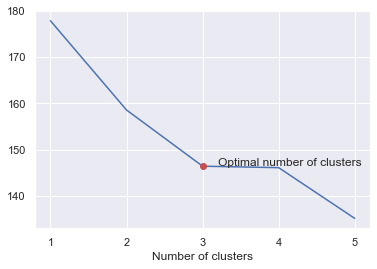

In [185]:
plt.plot(cost)
plt.annotate('Optimal number of clusters',
            xy=(2.2, cost[2]))
plt.plot(2, cost[2], marker='o', color='r')
plt.xlabel('Number of clusters')
plt.xticks([0,1,2,3,4], [1,2,3,4,5])
plt.show()

So the optimal number of clusters is 3 and we can recalculate the clusters more thoroughly.

In [186]:
cluster = solutions[2]

We can see each cluster of what unit is formed.


In [187]:
def clusterization(cluster, data):
    c1 = []
    c2 = []
    c3 = []
    for i in range(0, len(data)):
        if cluster[0].iloc[i][0] == 1:
            c1.append(data.iloc[i])
        if cluster[0].iloc[i][1] == 1:
            c2.append(data.iloc[i])
        if cluster[0].iloc[i][2] == 1:
            c3.append(data.iloc[i])

    c1 = pd.DataFrame(c1)
    c2 = pd.DataFrame(c2)
    c3 = pd.DataFrame(c3)
    return c1, c2, c3

division = clusterization(cluster, data) 
#output: pos0=cluster1, pos1=cluster2, pos2=cluster3

for i in range(0, len(division)):
    print('Cluster', i+1 ,'\n',division[i].head(), '\n')

Cluster 1 
     Alcohol  Malic acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
59    12.37        0.94  1.36               10.6       88.0           1.98   
60    12.33        1.10  2.28               16.0      101.0           2.05   
62    13.67        1.25  1.92               18.0       94.0           2.10   
64    12.17        1.45  2.53               19.0      104.0           1.89   
65    12.37        1.21  2.56               18.1       98.0           2.42   

    Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
59        0.57                  0.28             0.42             1.95  1.05   
60        1.09                  0.63             0.41             3.27  1.25   
62        1.79                  0.32             0.73             3.80  1.23   
64        1.75                  0.45             1.03             2.95  1.45   
65        2.65                  0.37             2.08             4.60  1.19   

    OD280/OD315_of_diluted_wines  Prol

And how many units is formed

In [188]:
for i in range(0, len(division)):
    print('Cluster', i+1, 'has', len(division[i]), 'units')

Cluster 1 has 42 units
Cluster 2 has 77 units
Cluster 3 has 59 units


The optimal cost is...

In [189]:
print(cluster[2])

146.41675536538463


### 3. See for which variables the clusters were formed

To see which variables contributed most to cluster creation, we can calculate the F-measure for each variable.

In [190]:
def f_variables(X, U):
    U_inv = pd.DataFrame(np.linalg.pinv(U.values))

    fm = []
    for var in range(0, len(X.iloc[0])):
        z_vars = stats.zscore(X.iloc[:, var])
        Xm = np.dot(U_inv, z_vars)
        Db = np.dot(np.dot(Xm.transpose(), U.transpose()), np.dot(U, Xm))
        Dw = np.dot((z_vars - (np.dot(U, Xm))).transpose(), (z_vars - np.dot(U, Xm)))
        fm.append( (Db/(len(U.iloc[0]) - 1)) / (Dw/(len(X) - len(U.iloc[0]))))

    return fm

In [191]:
f_measure_variables = f_variables(data, cluster[0])
print(f_measure_variables)

[37.535671756790244, 48.61906150085627, 10.975018843280521, 23.722095350076142, 23.189718437470326, 165.63064107501847, 274.4662471518977, 43.40307680974492, 49.52719042101561, 50.805800010795785, 112.06917479642435, 192.6395204288757, 83.2533169337406]


We can see that the variables with the highest F-measure are those corresponding to positions 5, 6, 11.

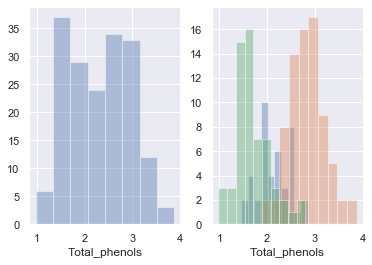

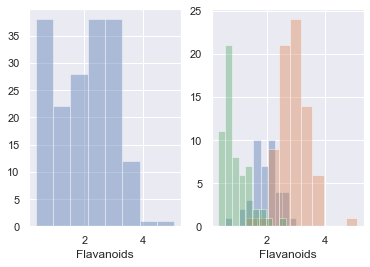

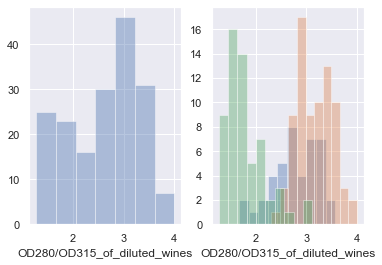

In [192]:
# TOTAL PHENOLS
sns.set(color_codes=True)
plt.subplot(121)
sns.distplot(data.iloc[:, 5], kde=False);
plt.subplot(122)
for i in range(0, len(division)):
    sns.distplot(division[i].iloc[:, 5], kde=False, bins=10);

plt.show()

# Flavanoids
plt.subplot(121)
sns.distplot(data.iloc[:, 6], kde=False);
plt.subplot(122)
for i in range(0, len(division)):
    sns.distplot(division[i].iloc[:, 6], kde=False, bins=10);
plt.show()

# OD280/OD315_of_diluted_wines
plt.subplot(121)
sns.distplot(data.iloc[:, 11], kde=False);
plt.subplot(122)
for i in range(0, len(division)):
    sns.distplot(division[i].iloc[:, 11], kde=False, bins=10);

plt.show()

# 4. K-means can go wrong!

K-means is able to find the optimal solution in a few steps, but sometimes it can take the wrong path.
The choice of the initial partition can affect the final partition. In other words, the algorithm can be trapped between local minimal.

In order not to make this thing happen it is possible to initialize the algorithm in different ways that guarantee us (more or less) an optimal solution or close to it.

We can initialize K-means with:
- Random Start: the algorithm is repeated with different initial classifications chosen randomly and it is chosen between the final ones, that of minimum deviance (cost);
- Rational Choice: maximum distance centroids.

We pay attention to rational choice. If we reason on the contrary it means that if we put the centroids all in the central point of the units (or in any case very close to each other), the algorithm could reach a NOT optimal solution.

So we can implement a new algorithm to see if our objective function is arbitrarily larger from the cost of the optimal solution, which in our case is about '2000'.

Attention: there is no need to perform a random start because the centroids are chosen by us and the value of the objective function will always be the same.

#### We choose the same number of clusters as in point 3, which is 3.


We can then implement K-means.

In [8]:
# WRONG INIZIALIZATION, this assures us that initially the centroids are all in the center.
def randPU_wrong2(n, K):
    # all 0 matrix
    Uzero = []
    for k in range(0, n):
        Uzero.append([1] * K)

    return Uzero

# UTILS FUNCTIONS
def mse(Xrow, Xmean0row1):
    min_dif = 0
    for r in range(0, len(Xrow)):

        min_dif += (Xrow[r] - Xmean0row1[r])**2
        
    MSE = min_dif/len(Xrow)
    return MSE

def mse2(Xrow, Xmean0row1):
    min_dif = 0
    for r in range(0, len(Xrow)):
        
        min_dif += (Xrow[r] - Xmean0row1[r])**2
        
    MSE = min_dif/len(Xrow)
    return MSE

def costf(X, Xmean_ott, U):
    cost = 0
    for i in range(0, len(X)):
        for j in range(0, len(U.iloc[0])):
            if U.iloc[i, j] == 1:
                cost += mse(X.iloc[i], Xmean_ott.iloc[j])
    return cost            

def diagSU(su):
    '''

    :param su: sum of U_0 columns
    :return: diagonal matrix
    '''
    Uzero = []
    for j in range(0, len(su)):
        Uzero.append([0] * len(su))

    for j in range(0, len(su)):
        Uzero[j][j] = 1 / su[j]

    return Uzero

def diagonalize(su):
    '''

    :param su: diagonal of a matrix
    :return: diagonal matrix
    '''

    Uzero = []
    for j in range(0, len(su)):
        Uzero.append([0] * len(su))

    for j in range(0, len(su)):
        Uzero[j][j] = su[j]
    Uzero = pd.DataFrame(Uzero)
    return Uzero

In [12]:
def kmeans_wrong(X, K, Rndstart):

    '''

    :param X: data Matrix
    :param K: Number of cluster of the partition
    :param Rndstart: number of random start
    :return:
    '''

    maxiter = 100
    n = len(X)
    j = len(X.iloc[0])
    epsilon = 0.00001

    # find the best solution in a fixed number of random start partitions
    for loop in range(0, Rndstart):
        
        # initial WRONG partition U_0 is given
         
        U_0 = pd.DataFrame(randPU_wrong2(n, K))
        
        # column frequency = random cluster
        sum_col = []
        for r in range(0, K):
            sum_col.append(sum(U_0[r]))
        
        # 1/su on diagonal of a NxN matrix
        su_diag = diagSU(sum_col)

        # given U compute Xmean (centroids)
        Ut = U_0.transpose()
        dot1 = pd.DataFrame(np.dot(su_diag, Ut))

        Xmean0 = round(pd.DataFrame(np.dot(dot1, X)), 4)
       




        for iter in range(1,maxiter):
            #given Xmean = assign each units to the closest cluster
            U = []
            for r in range(0, n):
                 U.append([0] * K)
                    
            
            for r in range(0, n):
                
                min_dif = mse(X.iloc[r], Xmean0.iloc[0])
                
                posmin = 0
                for j in range(1, K):
                    
                    dif = mse(X.iloc[r], Xmean0.iloc[j])
                    if dif < min_dif:
                        min_dif = dif
                        posmin = j
                U[r][posmin] = 1
            
            U = pd.DataFrame(U)
            

            # given a partition of units, so given U compute Xmean (centroids)

            # update sum_col
            sum_col = []
            for t in range(0, K):
                sum_col.append(sum(U[t]))
            
            
            ## RARE CASE (BUT POSSIBLE) #############################################################
            #if there is some empty cluster we must split the cluster with max sum_col
            while sum([sum_col[h] == 0 for h in range(0, len(sum_col))]) > 0: # some cluster is empty

                p1 = min(sum_col)
                p2 = max(sum_col)

                # select min column (empty cluster)
                for j in range(0, len(sum_col)):
                    if p1 == sum_col[j]:
                        c1 = j

                # select max column (cluster) for split its points to empty cluster
                for k in range(0, len(sum_col)):
                    if p2 == sum_col[k]:
                        c2 = k

                # list of units in max column (cluster)
                ind = []
                for row in range(0, len(U)):
                    if int(U.iloc[row, c2]) == 1:
                        ind.append(row)

                # split max cluster
                ind2 = []
                for row in range(0, p2//2):
                    ind2.append(row)

                for row in range(0, len(ind2)):
                    U.iloc[row, c1] = 1
                    U.iloc[row, c2] = 0

                sum_col = []
                for q in range(0, K):
                    sum_col.append(sum(U[q]))
            #################################################################################################
            
            # give U compute centroids
            _U = U.transpose()
            _dot1 = pd.DataFrame(np.dot(diagSU(sum_col), _U))
            Xmean = round(pd.DataFrame(np.dot(dot1, X)), 4)
            

            #compute ojective function
            BB = (np.dot(U, Xmean)) - X
            f = round(np.trace(np.dot(BB.transpose(), BB)), 4)


            #stopping rule
            dif = 0
            
            for k in range(0, K):
                dif += mse2(Xmean.iloc[k], Xmean0.iloc[k])
                    
            if dif > epsilon:
                Xmean0 = Xmean
            else:
                break

        if loop == 0:
            U_ott = U
            f_ott = f
            Xmean_ott = Xmean

        if f < f_ott:
            
            U_ott = U
            f_ott = f
            Xmean_ott = Xmean

    # calculate cost
    cost = costf(X, Xmean_ott, U_ott)
    print('Done')
    return round(pd.DataFrame(U_ott), 4), f_ott, cost

In [13]:
kluster = kmeans_wrong(dataS, 3, 1)

Done


In [14]:
print('Our objective function has value: ', kluster[2])

Our objective function has value:  177.92262100461545


#### Conclusion

The objective function in the case of incorrect initialization of the algorithm has a greater value than our optimal solution (about 30 more!).
So we can say that K-means is conditioned by the choice of initial centroids.